# Llama 3.2 Release -- Experince with Gradio 5.0 and Huggingface



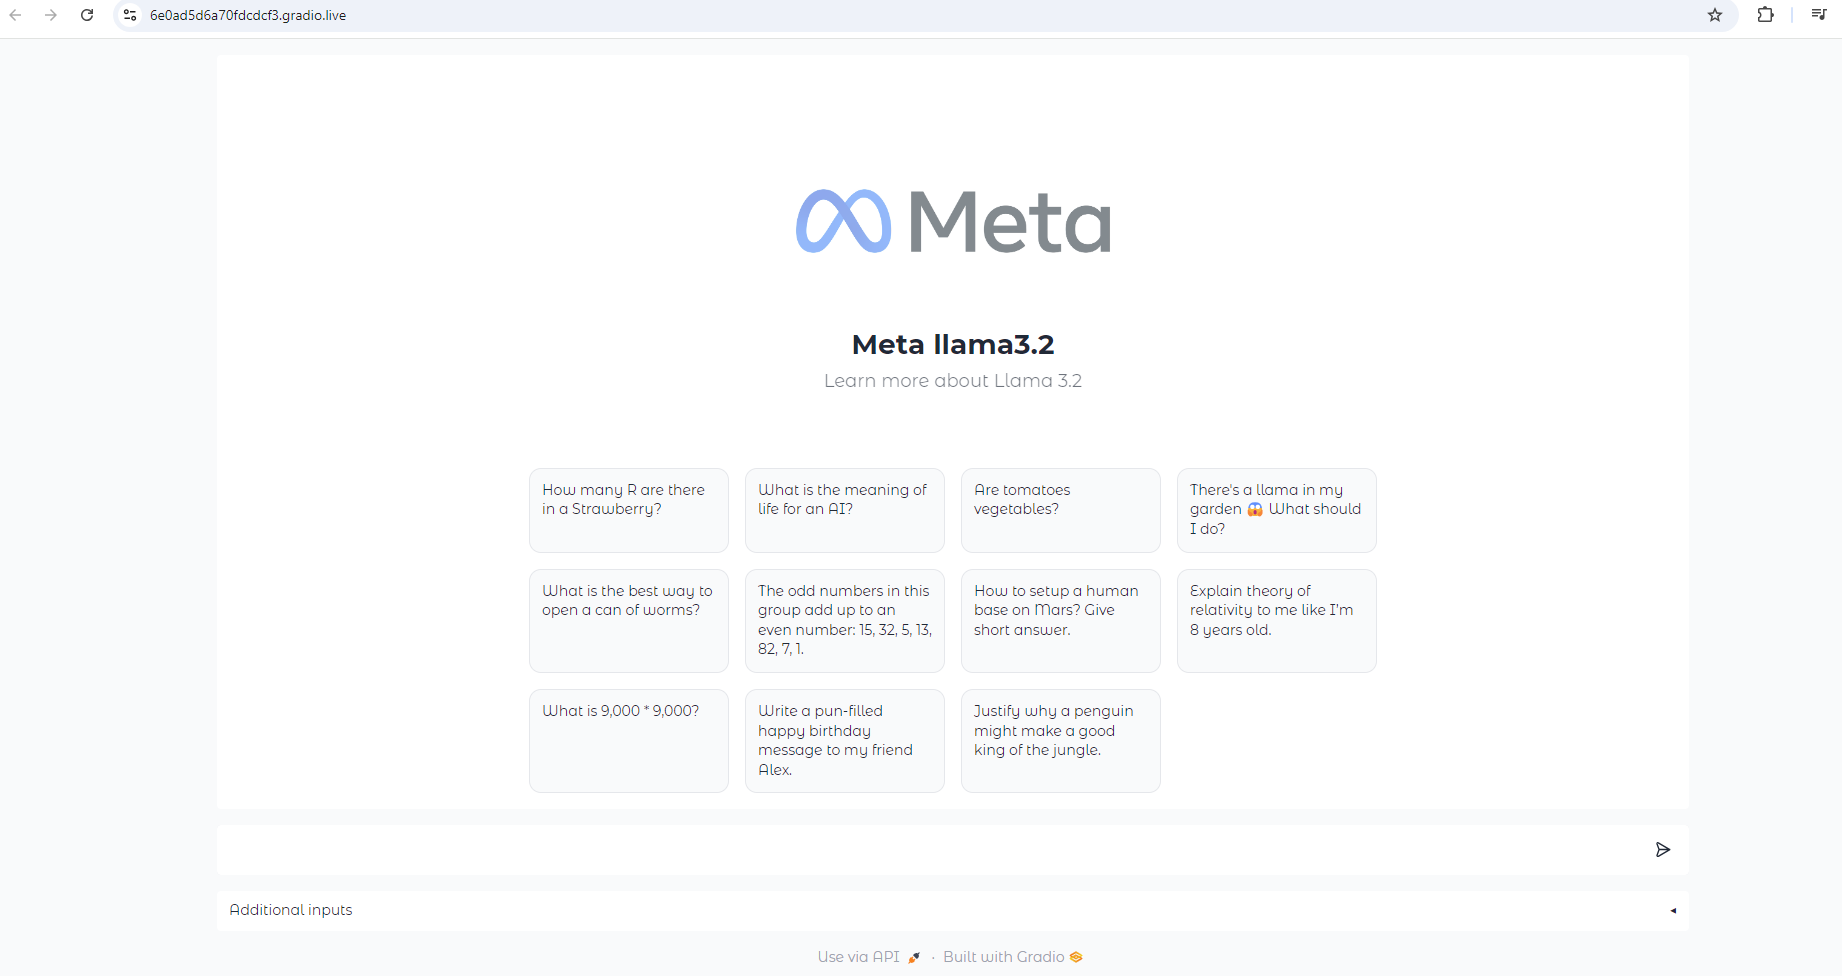

### Install Gradio 5 beta

In [1]:
!pip install -q gradio --pre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

### Install required packages

In [2]:
!pip install accelerate==0.33.0 bitsandbytes==0.43.2 transformers==4.43.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 99.7 MB/s eta 0:00:00


### Set up your Huggingfacetoken as environ variable

In [4]:
import os
# print(os.environ["HF_TOKEN"])

In [7]:
from google.colab import userdata

hf_token = userdata.get('HF_TOKEN')  # Replace 'hf_token' with your actual key name

if hf_token:
  os.environ["HF_TOKEN"] = hf_token
  print("HF_TOKEN set successfully.")
else:
  print("HF_TOKEN not found in Colab keys.")

HF_TOKEN set successfully.


### Download model from Huggingface Hub

In [9]:
#llama 3.2 3b IT
import os
from threading import Thread
from typing import Iterator

import gradio as gr
#import spaces
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TextIteratorStreamer

In [11]:
from llama_cpp import Llama

llm = Llama.from_pretrained(
	repo_id="Orenguteng/Llama-3.1-8B-Lexi-Uncensored-V2-GGUF",
	filename="Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf",
)

llm.create_chat_completion(
	messages = [
		{
			"role": "user",
			"content": "What is the capital of France?"
		}
	]
)

ModuleNotFoundError: No module named 'llama_cpp'

# Uncensored Llama 3.1 8B v2 GGUF

In [12]:
# First, install the llama-cpp-python package
!pip install llama-cpp-python

# Import and use Llama
from llama_cpp import Llama

# Initialize the model
llm = Llama.from_pretrained(
    repo_id="Orenguteng/Llama-3.1-8B-Lexi-Uncensored-V2-GGUF",
    filename="Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf",
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 36.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.0 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.1-cp310-cp310-linux_x86_64.whl size=3510517 sha256=c3ae82b2a362a3450c02426d999149d899e99753e6b69254fc0ac10e42010f5c
  Stored in directory: /root/.cache/pip/wheels/f8/b0/a2/f47d952aec7ab061b9e2a345e23a1e1e137beb7891259e3d0c
Successfully built llama-cpp-python


Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf:   0%|          | 0.00/16.1G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 28 key-value pairs and 292 tensors from /root/.cache/huggingface/hub/models--Orenguteng--Llama-3.1-8B-Lexi-Uncensored-V2-GGUF/snapshots/26b840c1e723c2f2330ea298f6fd2c57c54eb888/./Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Meta Llama 3.1 8b Instruct
llama_model_loader: - kv   3:                       general.organization str              = Unsloth
llama_model_loader: - kv   4:                           general.finetune str              = instruct
llama_model_loader: - kv   5:                           general.basename str              = meta-

{'id': 'chatcmpl-8d2c302d-a9ef-413a-84e0-3475b112a381', 'object': 'chat.completion', 'created': 1729189392, 'model': '/root/.cache/huggingface/hub/models--Orenguteng--Llama-3.1-8B-Lexi-Uncensored-V2-GGUF/snapshots/26b840c1e723c2f2330ea298f6fd2c57c54eb888/./Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The capital of France is Paris.'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 42, 'completion_tokens': 7, 'total_tokens': 49}}


In [13]:

# Create a chat completion
response = llm.create_chat_completion(
    messages = [
        {
            "role": "user",
            "content": "What is the capital of France?"
        }
    ]
)

print(response)

Llama.generate: 41 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    2438.16 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     8 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2473.05 ms /     9 tokens


{'id': 'chatcmpl-51c0f600-1b9d-4b51-b99e-ffdf304c6ed9', 'object': 'chat.completion', 'created': 1729189417, 'model': '/root/.cache/huggingface/hub/models--Orenguteng--Llama-3.1-8B-Lexi-Uncensored-V2-GGUF/snapshots/26b840c1e723c2f2330ea298f6fd2c57c54eb888/./Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The capital of France is Paris.'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 42, 'completion_tokens': 7, 'total_tokens': 49}}


In [14]:
# Create a chat completion
response = llm.create_chat_completion(
    messages = [
        {
            "role": "user",
            "content": "What what sexual crimes was Harvey Weinstein accused of?"
        }
    ]
)

plain_text_prompt = response['choices'][0]['message']['content']
print(plain_text_prompt = response['choices'][0]['message']['content']
)


Llama.generate: 31 prefix-match hit, remaining 14 prompt tokens to eval
llama_perf_context_print:        load time =    2438.16 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    14 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   238 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   67296.94 ms /   252 tokens


{'id': 'chatcmpl-ff4ae088-b50f-4ec1-960a-07706cf36575', 'object': 'chat.completion', 'created': 1729189471, 'model': '/root/.cache/huggingface/hub/models--Orenguteng--Llama-3.1-8B-Lexi-Uncensored-V2-GGUF/snapshots/26b840c1e723c2f2330ea298f6fd2c57c54eb888/./Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Harvey Weinstein was accused of numerous sexual crimes.  Here are some of the most well-known allegations:\n\n1.   Rape: Weinstein was accused of raping several women, including actress Annabella Sciorra, who claimed that Weinstein raped her in the early 1990s. \n2.   Sexual Assault: Many women came forward with allegations of sexual assault against Weinstein, including actress Rose McGowan, who claimed that Weinstein forcibly raped her in 1997.\n3.   Harassment: Weinstein was also accused of harassing many women in the film industry, including actresses Ashley Judd and Gwyneth Paltrow.\n4.   Unwanted Touching: Many women 

## Flux Uncensored

In [ ]:
# Install required packages
!pip install diffusers transformers accelerate

In [ ]:
# Import necessary libraries
from diffusers import DiffusionPipeline
import torch
from PIL import Image

In [ ]:
# Check if CUDA is available and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

In [ ]:
# Load the model
pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.float16)
pipe = pipe.to(device)

# Load LoRA weights
pipe.load_lora_weights("enhanceaiteam/Flux-uncensored")

In [16]:
# Set the prompt
prompt = "nude bear on beach"

# Generate the image
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

# Display the image
display(image)

# Optionally, save the image
image.save("generated_image.png")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.9 MB/s eta 0:00:00
Using device: cuda


model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

ValueError: PEFT backend is required for this method.

In [17]:
# Install necessary libraries if needed
!pip install gradio llama-cpp-python diffusers transformers accelerate torch

# Import necessary libraries
import gradio as gr
from llama_cpp import Llama
from diffusers import DiffusionPipeline
import torch

# Step 1: Initialize the Llama model (Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf)
llm = Llama.from_pretrained(
    repo_id="Orenguteng/Llama-3.1-8B-Lexi-Uncensored-V2-GGUF",
    filename="Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf",
)

# Step 2: Initialize the text-to-image model (enhanceaiteam/Flux-uncensored)
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.load_lora_weights("enhanceaiteam/Flux-uncensored")

# Function to generate a descriptive prompt and image based on input fields
def generate_image(age, gender, hobby):
    # Step 3: Create descriptive text prompt using Llama model
    prompt_response = llm.create_chat_completion(
        messages=[
            {
                "role": "user",
                "content": f"Generate a rich descriptive text prompt based on age: {age}, gender: {gender}, and hobby: {hobby}."
            }
        ]
    )
    text_prompt = prompt_response['choices'][0]['message']['content']

    # Step 4: Generate image based on the generated text prompt
    image = pipe(text_prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

    return image

# Step 5: Set up Gradio interface
interface = gr.Interface(
    fn=generate_image,
    inputs=[
        gr.inputs.Slider(0, 100, label="Age"),       # Slider for age
        gr.inputs.Radio(choices=["Male", "Female", "Other"], label="Gender"),   # Radio button for gender
        gr.inputs.Textbox(lines=1, placeholder="Enter your hobby", label="Hobby")  # Textbox for hobby
    ],
    outputs="image",
    title="Text-to-Image Generation using Llama & FLUX",
    description="Enter your age, gender, and hobby, and watch a rich, descriptive text prompt generate a beautiful image!"
)

# Launch the interface
interface.launch()


llama_model_loader: loaded meta data with 28 key-value pairs and 292 tensors from /root/.cache/huggingface/hub/models--Orenguteng--Llama-3.1-8B-Lexi-Uncensored-V2-GGUF/snapshots/26b840c1e723c2f2330ea298f6fd2c57c54eb888/./Llama-3.1-8B-Lexi-Uncensored_V2_F16.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Meta Llama 3.1 8b Instruct
llama_model_loader: - kv   3:                       general.organization str              = Unsloth
llama_model_loader: - kv   4:                           general.finetune str              = instruct
llama_model_loader: - kv   5:                           general.basename str              = meta-

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [19]:
!pip install diffusers transformers accelerate peft

In [2]:
# Import necessary libraries
from diffusers import DiffusionPipeline
import torch
from PIL import Image

In [3]:
# Check if CUDA is available and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Load the model
pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.float16)
pipe = pipe.to(device)

# Load LoRA weights
pipe.load_lora_weights("enhanceaiteam/Flux-uncensored")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
import torch
import gc

# Delete the model object (replace 'model' with your actual model variable name if different)
try:
    del model
except NameError:
    pass

# Clear CUDA cache
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Collect garbage
gc.collect()

print('Model unloaded and GPU memory cleared.')

Model unloaded and GPU memory cleared.


In [1]:
!nvidia-smi

Thu Oct 17 18:57:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              42W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev")
pipe.load_lora_weights("prashanth970/flux-lora-uncensored")

prompt = "a naked bear on a beach with a bloody knife"
image = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [18]:




# Set the prompt
prompt = "nude bear on beach"

# Generate the image
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

# Display the image
display(image)

# Optionally, save the image
image.save("generated_image.png")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 19.2 MB/s eta 0:00:00
Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

ValueError: PEFT backend is required for this method.

### Main Gradio inference function

In [ ]:
def generate(
    message: str,
    chat_history: list[tuple[str, str]],
    max_new_tokens: int = 1024,
    temperature: float = 0.6,
    top_p: float = 0.9,
    top_k: int = 50,
    repetition_penalty: float = 1.2,
) -> Iterator[str]:

    conversation = [{k: v for k, v in d.items() if k != 'metadata'} for d in chat_history]
    conversation.append({"role": "user", "content": message})

    input_ids = tokenizer.apply_chat_template(conversation, add_generation_prompt=True, return_tensors="pt")
    if input_ids.shape[1] > MAX_INPUT_TOKEN_LENGTH:
        input_ids = input_ids[:, -MAX_INPUT_TOKEN_LENGTH:]
        gr.Warning(f"Trimmed input from conversation as it was longer than {MAX_INPUT_TOKEN_LENGTH} tokens.")
    input_ids = input_ids.to(model.device)

    streamer = TextIteratorStreamer(tokenizer, timeout=20.0, skip_prompt=True, skip_special_tokens=True)
    generate_kwargs = dict(
        {"input_ids": input_ids},
        streamer=streamer,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        top_p=top_p,
        top_k=top_k,
        temperature=temperature,
        num_beams=1,
        repetition_penalty=repetition_penalty,
    )
    t = Thread(target=model.generate, kwargs=generate_kwargs)
    t.start()

    conversation.append({"role": "assistant", "content": ""})
    outputs = []
    for text in streamer:
        outputs.append(text)
        bot_response = "".join(outputs)
        conversation[-1]['content'] = bot_response
        yield "", conversation


### Implementing Gradio 5 features and building a ChatInterface UI yourself

In [ ]:
PLACEHOLDER = """<div style="padding: 20px; text-align: center; display: flex; flex-direction: column; align-items: center;">
   <img src="https://ysharma-dummy-chat-app.hf.space/file=/tmp/gradio/c21ff9c8e7ecb2f7d957a72f2ef03c610ac7bbc4/Meta_lockup_positive%20primary_RGB_small.jpg" style="width: 80%; max-width: 550px; height: auto; opacity: 0.55; margin-bottom: 10px;">
   <h1 style="font-size: 28px; margin: 0;">Meta llama3.2</h1>
   <p style="font-size: 18px; margin: 5px 0 0; opacity: 0.65;">
       <a href="https://huggingface.co/blog/llama32" target="_blank" style="color: inherit; text-decoration: none;">Learn more about Llama 3.2</a>
   </p>
</div>"""


In [ ]:
import gradio as gr
import random
import time

def handle_retry(history, retry_data: gr.RetryData):
    new_history = history[:retry_data.index]
    previous_prompt = history[retry_data.index]['content']
    yield from generate(previous_prompt, chat_history = new_history, max_new_tokens = 1024, temperature = 0.6, top_p = 0.9, top_k = 50, repetition_penalty = 1.2)

def handle_like(data: gr.LikeData):
    if data.liked:
        print("You upvoted this response: ", data.value)
    else:
        print("You downvoted this response: ", data.value)

def handle_undo(history, undo_data: gr.UndoData):
    chatbot = history[:undo_data.index]
    prompt = history[undo_data.index]['content']
    return chatbot, prompt

def chat_examples_fill(data: gr.SelectData):
    yield from generate(data.value['text'], chat_history = [], max_new_tokens = 1024, temperature = 0.6, top_p = 0.9, top_k = 50, repetition_penalty = 1.2)


with gr.Blocks(theme=gr.themes.Soft(), fill_height=True) as demo:
    with gr.Column(elem_id="container", scale=1):
        chatbot = gr.Chatbot(
            label="Llama3.2 3B Instruct Chatbotw using Gradio 5",
            show_label=False,
            type="messages",
            scale=1,
            suggestions = [
                {"text": "How many R are there in a Strawberry?"},
                {"text": "What is the meaning of life for an AI?"},
                {"text": "Are tomatoes vegetables?"},
                {"text": "There's a llama in my garden 😱 What should I do?"},
                {"text": "What is the best way to open a can of worms?"},
                {"text": "The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. "},
                {"text": 'How to setup a human base on Mars? Give short answer.'},
                {"text": 'Explain theory of relativity to me like I’m 8 years old.'},
                {"text": 'What is 9,000 * 9,000?'},
                {"text": 'Write a pun-filled happy birthday message to my friend Alex.'},
                {"text": 'Justify why a penguin might make a good king of the jungle.'}
                ],
            placeholder = PLACEHOLDER,
            )

    msg = gr.Textbox(submit_btn=True, show_label=False)
    with gr.Accordion('Additional inputs', open=False):
        max_new_tokens = gr.Slider(label="Max new tokens", minimum=1, maximum=10, step=1, value=23, )
        temperature = gr.Slider(label="Temperature",minimum=0.1, maximum=4.0, step=0.1, value=0.6,)
        top_p = gr.Slider(label="Top-p (nucleus sampling)", minimum=0.05, maximum=1.0, step=0.05, value=0.9, )
        top_k = gr.Slider(label="Top-k", minimum=1, maximum=1000, step=1, value=50, )
        repetition_penalty = gr.Slider(label="Repetition penalty", minimum=1.0, maximum=2.0, step=0.05, value=1.2, )

    msg.submit(generate, [msg, chatbot, max_new_tokens, temperature, top_p, top_k, repetition_penalty], [msg, chatbot])
    chatbot.retry(handle_retry, chatbot, [msg, chatbot])
    chatbot.like(handle_like, None, None)
    chatbot.undo(handle_undo, chatbot, [chatbot, msg])
    chatbot.suggestion_select(chat_examples_fill, None, [msg, chatbot] )


demo.launch(debug=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6e0ad5d6a70fdcdcf3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
